# State of the art methods 

## Apply in TAIEX 1992 Stock Index Time Series

In [1]:
import numpy as np
import pandas as pd
from FTS import fts_util
from PyEMD import EMD
import seaborn as sns
import matplotlib.pyplot as plt
cores = sns.color_palette(n_colors=21)

In [2]:
taiex = pd.read_csv('data/TAIEX_1992.csv', index_col=[0])
taiex.head()
col = taiex.keys().to_list()[0]

In [3]:
Ul = 3000
Uu = 5500

In [4]:
D1 = min(taiex[col].values) - Ul
D2 = Uu - max(taiex[col].values)

print('MIn:{} Max:{}'.format(min(taiex[col].values),max(taiex[col].values)))
print('D1:{} and D2:{}'.format(D1,D2))
print('U = [{},{}]'.format(Ul,Uu))

MIn:3327.67 Max:5391.63
D1:327.6700000000001 and D2:108.36999999999989
U = [3000,5500]


In [6]:
col = taiex.keys().to_list()[0]

## Chen method 1996

No handles with labels found to put in legend.


Chen 1996 model
MAPE......: 2.49
------------------------------
MAE.......: 104.11
------------------------------
MSE.......: 15253.49
------------------------------
RMSE......: 123.51
------------------------------
DTW.......: 25822.560000000023


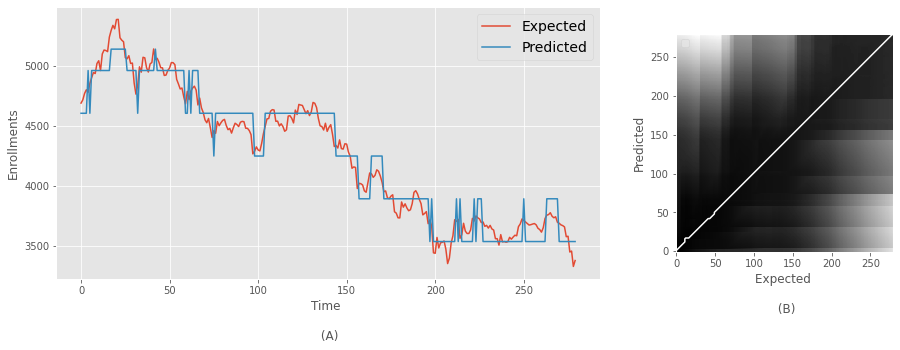


SUMMARY
------------------------------
Partition:280 size:281



In [8]:
from FTS.Models.Chen import Chen1996

model = Chen1996()
model.fit(taiex[col].values, sets=7, d1=D1, d2=D2)
model.predict()
model.summary()

## Lee method 2009

No handles with labels found to put in legend.


MAPE......: 1.93
------------------------------
MAE.......: 81.95
------------------------------
MSE.......: 10168.11
------------------------------
RMSE......: 100.84
------------------------------
DTW.......: 20025.221366153823


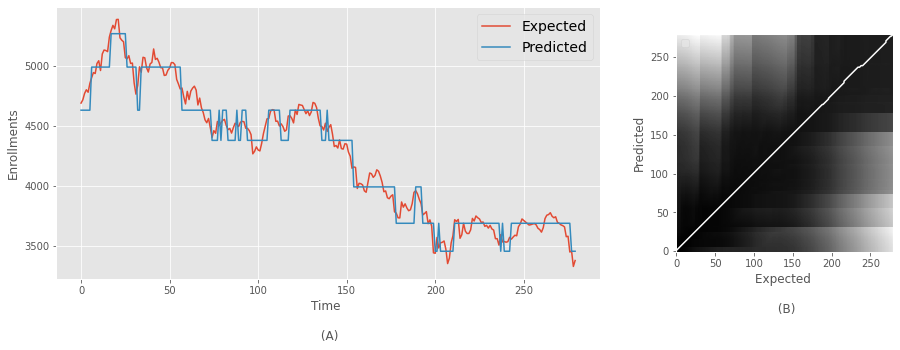

(1.93, 81.95, 10168.11, 100.84, 20025.221366153823)

In [9]:
from FTS.Models.Lee import Lee2009
model = Lee2009()
model.fit(taiex[col].values, sets=7 ,d1=D2, d2=D2)
model.predict()

## Wang method 2013 + Chen method 1996

In [10]:
from FTS.Models.Wang_Chen import Wang2013_Chen
from FTS.Models.Wang_Lee import Wang2013_Lee

No handles with labels found to put in legend.


MAPE......: 3.4
------------------------------
MAE.......: 140.05
------------------------------
MSE.......: 31678.62
------------------------------
RMSE......: 177.98
------------------------------
DTW.......: 29366.849623210772


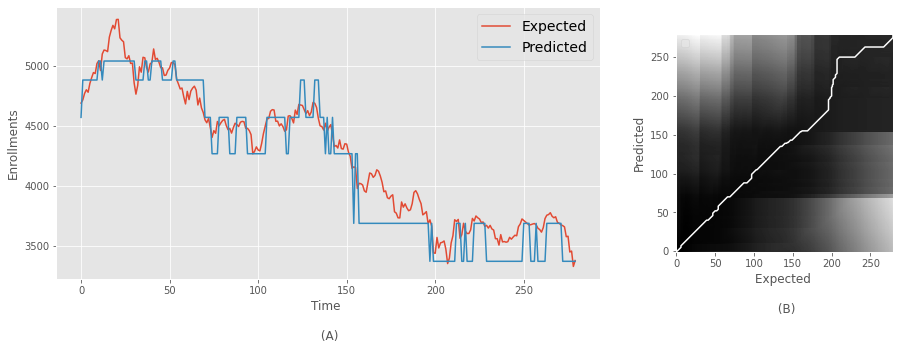

(3.4, 140.05, 31678.62, 177.98, 29366.849623210772)

In [11]:
model = Wang2013_Chen()
model.fit(taiex[col].values, sets=7, d1=D1, d2=D2)
model.predict()

## Wang method 2013 + Lee method 2013

No handles with labels found to put in legend.


MAPE......: 6.49
------------------------------
MAE.......: 249.27
------------------------------
MSE.......: 135598.26
------------------------------
RMSE......: 368.24
------------------------------
DTW.......: 65946.59052058324


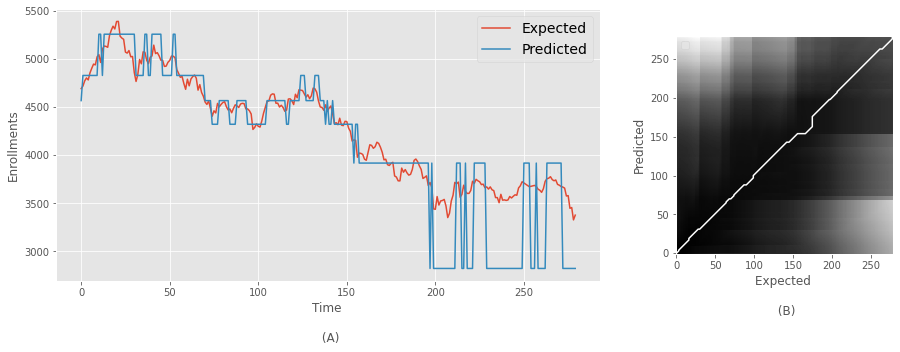

(6.49, 249.27, 135598.26, 368.24, 65946.59052058324)

In [12]:
model = Wang2013_Lee()
model.fit(taiex[col].values, sets=7, d1=D1, d2=D2)
model.predict()

### Proposed Method + Chen method 1996

In [13]:
# apply EMD to get IMFs
emd = EMD()
imfs = emd.emd(taiex[col].values)

df_fts = pd.DataFrame(taiex[col].copy())
df_fts[col] = taiex

col_imf = '2+3+residue'
df_fts[col_imf] = imfs[2]+imfs[3]+imfs[4]

In [14]:
from FTS.Models.MV_Chen import STFMV_Convencional_Chen
from FTS.Models.MV_Lee import STFMV_Convencional_Lee

/home/nigom/.py3env/lib/python3.6/site-packages/fcmeans/fcm.py:51: RuntimeWarning: divide by zero encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_
/home/nigom/.py3env/lib/python3.6/site-packages/fcmeans/fcm.py:51: RuntimeWarning: invalid value encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_


MAPE......: 2.27
------------------------------
MAE.......: 95.52
------------------------------
MSE.......: 13610.31
------------------------------
RMSE......: 116.66
------------------------------
DTW.......: 41.82573241372332


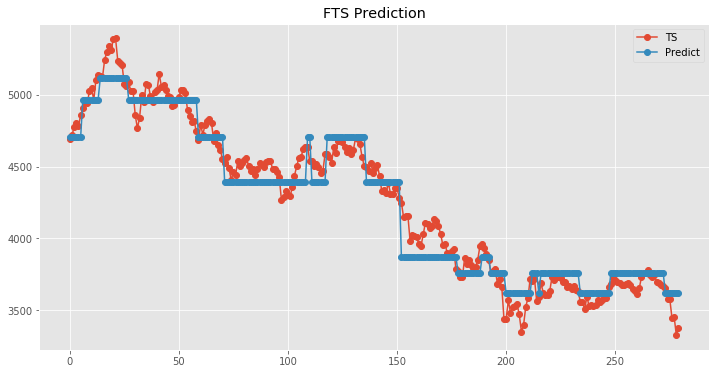

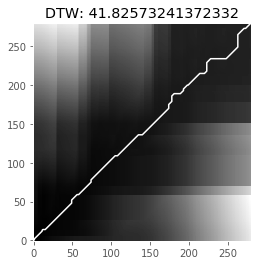

(2.27, 95.52, 13610.31, 116.66, 41.82573241372332)

In [15]:
model = STFMV_Convencional_Chen()
model.fit(X=df_fts[[col, col_imf]].values, k=7)
model.predict()

### Proposed Method + Lee method 2009

/usr/local/lib/python3.9/dist-packages/fcmeans/fcm.py:49: RuntimeWarning: divide by zero encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_
/usr/local/lib/python3.9/dist-packages/fcmeans/fcm.py:49: RuntimeWarning: invalid value encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_
No handles with labels found to put in legend.


MAPE......: 1.68
------------------------------
MAE.......: 71.5
------------------------------
MSE.......: 8379.15
------------------------------
RMSE......: 91.54
------------------------------
DTW.......: 18273.666069475905


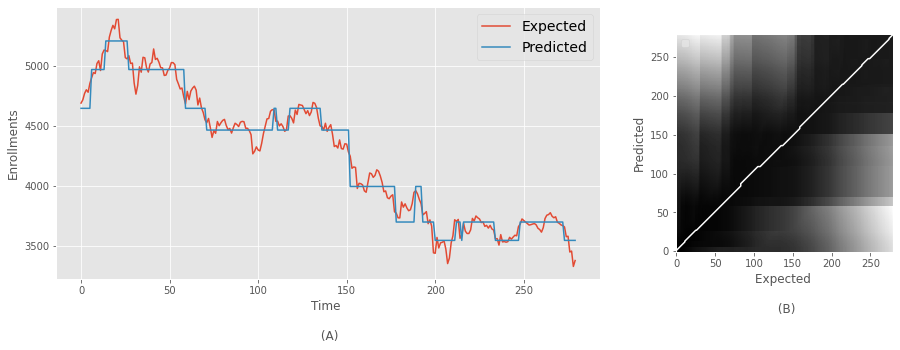

(1.68, 71.5, 8379.15, 91.54, 18273.666069475905)

In [15]:
model = STFMV_Convencional_Lee()
model.fit(X=df_fts[[col, col_imf]].values, k=7)
model.predict()